In [1]:
import pandas as pd

In [2]:
# Load the CSV file
df = pd.read_csv('output/jobs_20250713.csv')
df.shape

(8889, 14)

In [3]:
df['R1'] = df['profile'].str.contains('R1', case=False, na=False)
df['R2'] = df['profile'].str.contains('R2', case=False, na=False)
df['R3'] = df['profile'].str.contains('R3', case=False, na=False)
df['R4'] = df['profile'].str.contains('R4', case=False, na=False)

In [4]:
def extract_relevant_items(s):
    try:
        items = [item.strip() for item in s.split(';')]
    except:
        return None, None
    class_1 = []
    class_2 = []
    for i in range(len(items)):
        curr = items[i]
        prev = items[i - 1] if i > 0 else ''
        next = items[i + 1] if i < len(items) - 1 else ''
        
        if next == '»':
            class_1.append(curr)
        elif prev == '»':
            class_2.append(curr)
        elif prev != '»' and next != '»' and curr != '»':
            class_1.append(curr)
    return ','.join(set(class_1)), ','.join(set(class_2))

df['field_1'], df['field_2'] = zip(*df['field'].apply(extract_relevant_items))

In [5]:
from dateutil import parser
df['application_deadline'] = df['application_deadline'].apply(lambda x: parser.parse(x.split('(')[0].strip()) if pd.notnull(x) else None)

In [6]:
fields_1_list = []
fields_2_list = []
for i in range(len(df)):
    if pd.notnull(df['field_1'][i]):
        fields_1_list.extend(df['field_1'][i].split(','))
    if pd.notnull(df['field_2'][i]):
        fields_2_list.extend(df['field_2'][i].split(','))
len(set(fields_1_list))

47

In [7]:
for i in sorted(set(fields_1_list), key=lambda x: x[0].lower()):
    df[i] = df['field_1'].str.contains(i, case=False, na=False)

Text(0.5, 0, 'Number of Job Offers')

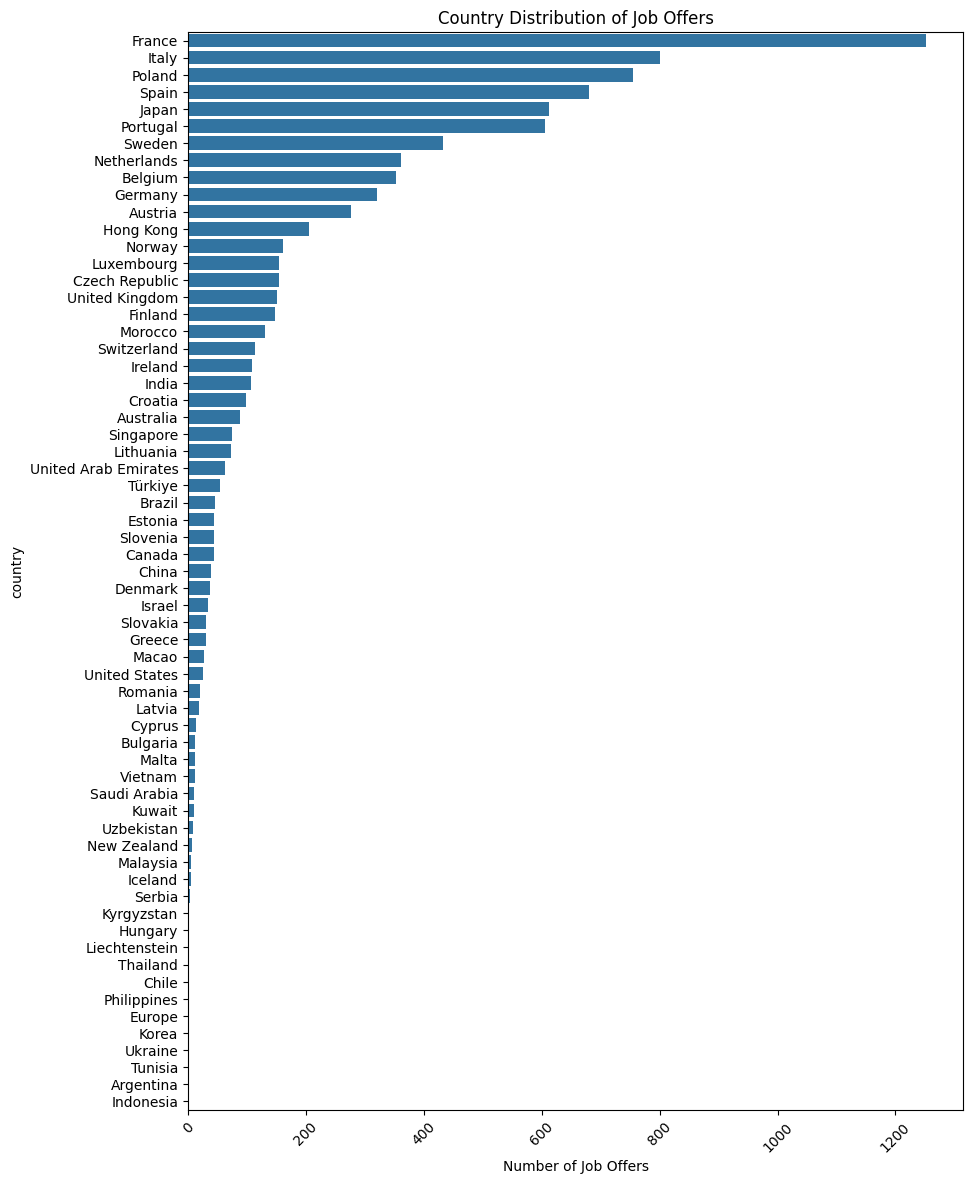

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Country distribution, only with more than 10 jobs
plt.figure(figsize=(10, 14))
sns.countplot(y='country', data=df, order=df['country'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Country Distribution of Job Offers')
plt.xlabel('Number of Job Offers')

Text(0, 0.5, 'Number of Job Offers')

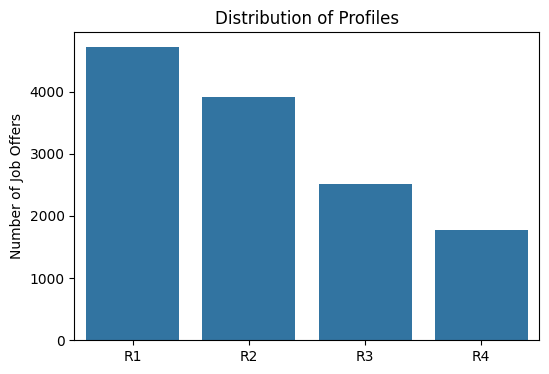

In [16]:
# Distribution of profiles
plt.figure(figsize=(6, 4))
R1_count = df['R1'].sum()
R2_count = df['R2'].sum()
R3_count = df['R3'].sum()
R4_count = df['R4'].sum()
sns.barplot(x=['R1', 'R2', 'R3', 'R4'], y=[R1_count, R2_count, R3_count, R4_count])
plt.title('Distribution of Profiles')
plt.ylabel('Number of Job Offers')

Text(0.5, 0, 'Number of Job Offers')

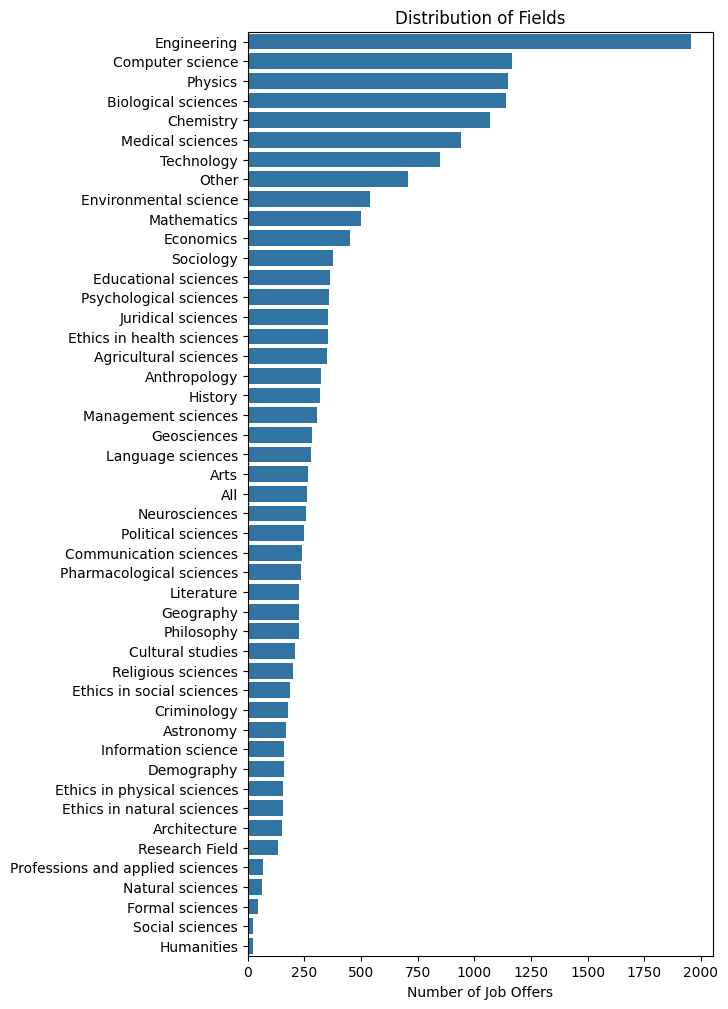

In [13]:
# Distribution of fields
field_dict = {}
for field in fields_1_list:
    field = field.strip()
    if field:
        field_dict[field] = field_dict.get(field, 0) + 1
plt.figure(figsize=(6, 12))
sns.barplot(x=list(field_dict.values()), y=list(field_dict.keys()), order=sorted(field_dict, key=field_dict.get, reverse=True))
plt.title('Distribution of Fields')
plt.xlabel('Number of Job Offers')

In [11]:
df

,id,type,country,university,posted_on,title,link,description,department,location,...,Psychological sciences,Philosophy,Pharmacological sciences,Political sciences,Professions and applied sciences,Religious sciences,Research Field,Social sciences,Sociology,Technology
0,360766,JOB,France,Ministere de l'Enseignement Superieur et de la...,Posted on: 13 July 2025,ATER-Psychologie et ergonomie,https://euraxess.ec.europa.eu/jobs/360766,"Psychologie clinique, psychopathologie, psycha...",NaN,"Number of offers: 1, France, UNIVERSITE DE POI...",...,True,False,False,False,False,False,False,False,False,False
1,360767,JOB,France,Ministere de l'Enseignement Superieur et de la...,Posted on: 13 July 2025,"ATER-Génie électrique, électronique, photoniqu...",https://euraxess.ec.europa.eu/jobs/360767,Génie électrique,NaN,"Number of offers: 1, France, UNIVERSITE DE POI...",...,False,False,False,False,False,False,False,False,False,False
2,360768,JOB,Sweden,Karolinska Institutet via Varbi,Posted on: 13 July 2025,Postdoctoral Researcher in perinatal pharmacoe...,https://euraxess.ec.europa.eu/jobs/360768,Do you want to contribute to top quality medic...,NaN,"Number of offers: 1, Sweden, Karolinska Instit...",...,False,False,False,False,False,False,False,False,False,False
3,360769,JOB,Germany,Helmholtz Association of German Research Centres,Posted on: 13 July 2025,PhD Position - Catalyst Development and Reacto...,https://euraxess.ec.europa.eu/jobs/360769,Area of research:PromotionJob description:Your...,NaN,"Number of offers: 1, Germany, Forschungszentru...",...,False,False,False,False,False,False,False,False,False,False
4,360770,JOB,Germany,Helmholtz Association of German Research Centres,Posted on: 13 July 2025,Postdoc (f/m/d) ? Materials Science or Chemist...,https://euraxess.ec.europa.eu/jobs/360770,Work group:Electrochemical Energy StorageArea ...,NaN,"Number of offers: 1, Germany, Helmholtz-Zentru...",...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8884,584389,JOB,Switzerland,Top Talents,Posted on: 5 December 2020,Visiting Postdoc / Lecturer/ Reader /Professor...,https://euraxess.ec.europa.eu/jobs/584389,"This position is under China Talents Scheme, a...",NaN,"Number of offers: 2, Switzerland, Jiaxing Univ...",...,False,False,False,False,False,False,False,False,False,True
8885,584388,JOB,Spain,Top Talents,Posted on: 5 December 2020,Visiting Postdoc / Lecturer/ Reader /Professor...,https://euraxess.ec.europa.eu/jobs/584388,"This position is under China Talents Scheme, a...",NaN,"Number of offers: 2, Spain, Jiaxing University...",...,False,False,False,False,False,False,False,False,False,True
8886,584387,JOB,Netherlands,Top Talents,Posted on: 5 December 2020,Visiting Postdoc / Lecturer/ Reader /Professor...,https://euraxess.ec.europa.eu/jobs/584387,"This position is under China Talents Scheme, a...",NaN,"Number of offers: 2, Netherlands, Jiaxing Univ...",...,False,False,False,False,False,False,False,False,False,True
8887,fias-fellowship-programme-call-applications-20...,FUNDING,France,RFIEA Foundation,Posted on: 24 July 2020,NaN,https://euraxess.ec.europa.eu/jobs/funding/fia...,Outline The French Institutes for Advanced Stu...,NaN,NaN,...,False,False,False,False,False,False,True,True,False,False


In [24]:
import ipywidgets as widgets
from IPython.display import display
from IPython.display import HTML

# 所有唯一标签
all_countries = df['country'].unique()
all_profiles = ['R1', 'R2', 'R3', 'R4']
all_fields = sorted(set(fields_1_list), key=lambda x: x[0].lower())

# 多选下拉框
country_selector = widgets.SelectMultiple(
    options=all_countries,
    description='国家 (多选):',
    style={'description_width': 'initial'}
)

profile_selector = widgets.SelectMultiple(
    options=all_profiles,
    description='职业档案 (多选):',
    style={'description_width': 'initial'}
)
field_selector = widgets.SelectMultiple(
    options=all_fields,
    description='领域 (多选):',
    style={'description_width': 'initial'}
)
def show_scrollable_df(df, max_height=300):
    html = df.to_html()
    return HTML(f"""
    <div style="overflow:auto; max-height:{max_height}px; border:1px solid #ccc">
        {html}
    </div>
    """)
# 显示 DataFrame 的函数
def filter_data(selected_countries, selected_profiles, selected_fields):
    df_filtered = df.copy()

    if selected_countries:
        for country in selected_countries:
            df_filtered = df_filtered[df_filtered['country'] == country]
    if selected_profiles:
        for profile in selected_profiles:
            df_filtered = df_filtered[df_filtered[profile] == True]
    if selected_fields:
        for field in selected_fields:
            df_filtered = df_filtered[df_filtered[field] == True]

    display(show_scrollable_df(df_filtered))


    
# 绑定事件
widgets.interact(filter_data, 
                 selected_countries=country_selector,
                 selected_profiles=profile_selector,
                 selected_fields=field_selector)




interactive(children=(SelectMultiple(description='国家 (多选):', options=('France', 'Sweden', 'Germany', 'Spain', …

<function __main__.filter_data(selected_countries, selected_profiles, selected_fields)>